In [109]:
%matplotlib inline
from plotly import express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20,10))

In [110]:
trips = pd.read_csv('trips_data.csv', sep = ';')
trips

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,Sao Paulo,Black,COMPLETED,2023-04-21 02:55:22 +0000 UTC,2023-04-21 02:59:16 +0000 UTC,-23.597908,-46.719670,Avenida Giovanni Gronchi & Rua Dona Adelina As...,2023-04-21 03:35:27 +0000 UTC,-23.586615,-46.694695,"Av. Henrique Schaumann, 80/124 - Pinheiros - S...",2.38,60.08,BRL
1,Sao Paulo,UberX,CANCELED,2023-04-20 22:08:32 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"R. Da Consolação, 1.050 - Consolação - São Pau...",0.00,0.00,BRL
2,Sao Paulo,UberX,CANCELED,2023-04-20 22:07:30 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"R. Da Consolação, 1.050 - Consolação - São Pau...",0.00,0.00,BRL
3,Sao Paulo,UberX,CANCELED,2023-04-20 22:01:56 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-23.567700,-46.590590,"Avenida Paes de Barros, 1815 - Mooca - São Pau...",1970-01-01 00:00:00 +0000 UTC,-23.560480,-46.598010,"R. Da Consolação, 1.050 - Consolação - São Pau...",0.00,5.00,BRL
4,Sao Paulo,UberX,COMPLETED,2023-03-11 22:29:33 +0000 UTC,2023-03-11 22:38:18 +0000 UTC,-23.651640,-46.567990,"Rua Erina Thome, 83 - Rudge Ramos - São Bernar...",2023-03-11 23:27:01 +0000 UTC,-23.531290,-46.654410,"Rua Barra Funda, 297 - Santa Cecília - São Pau...",12.47,54.91,BRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Sao Paulo,uberX,COMPLETED,2018-03-16 23:48:11 +0000 UTC,2018-03-16 23:53:39 +0000 UTC,-23.651546,-46.568015,"R. Erina Tomé, 2 - Vila Afonsina, São Bernardo...",2018-03-17 00:24:36 +0000 UTC,-23.646604,-46.541196,"R. das Aroeiras, 452 - Jardim, Santo André - S...",6.36,22.66,BRL
186,Sao Paulo,uberX,FARE_SPLIT,2018-03-10 18:28:37 +0000 UTC,2018-03-10 18:33:53 +0000 UTC,NaN,NaN,NaN,2018-03-10 19:13:42 +0000 UTC,NaN,NaN,NaN,10.77,40.91,BRL
187,Sao Paulo,uberX,COMPLETED,2018-03-04 09:04:55 +0000 UTC,2018-03-04 09:16:56 +0000 UTC,-23.535496,-46.635485,"Av. Cásper Líbero, 673 - Luz, São Paulo - SP, ...",2018-03-04 09:27:24 +0000 UTC,-23.547814,-46.644396,Condomínio Edificio Barão de Penedo - Consolaç...,1.81,8.97,BRL
188,Sao Paulo,uberX,COMPLETED,2018-03-04 00:49:29 +0000 UTC,2018-03-04 00:51:50 +0000 UTC,-23.547648,-46.644339,Condomínio Edifício São Luiz Plaza - República...,2018-03-04 01:02:46 +0000 UTC,-23.535509,-46.634841,"R. Mauá, 451 - Centro Histórico de São Paulo, ...",2.61,9.96,BRL


In [111]:
## Criando uma nova coluna apenas com o ano da corrida.

trips['Year'] = trips['Request Time'].str[:4]
trips

## Criando uma nova coluna com a distância em KM

trips['Distance Km'] = round(trips['Distance (miles)'] * 1.6)

## Convertendo as corridas em peso argentino para real, considerando 1 real = 30 pesos.

trips['Fare Amount BRL'] = trips['Fare Amount']
trips.loc[trips['Fare Currency'] == 'ARS', 'Fare Amount BRL'] = round(trips['Fare Amount'] / 30)
trips

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency,Year,Distance Km,Fare Amount BRL
0,Sao Paulo,Black,COMPLETED,2023-04-21 02:55:22 +0000 UTC,2023-04-21 02:59:16 +0000 UTC,-23.597908,-46.719670,Avenida Giovanni Gronchi & Rua Dona Adelina As...,2023-04-21 03:35:27 +0000 UTC,-23.586615,-46.694695,"Av. Henrique Schaumann, 80/124 - Pinheiros - S...",2.38,60.08,BRL,2023,4.0,60.08
1,Sao Paulo,UberX,CANCELED,2023-04-20 22:08:32 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"R. Da Consolação, 1.050 - Consolação - São Pau...",0.00,0.00,BRL,2023,0.0,0.00
2,Sao Paulo,UberX,CANCELED,2023-04-20 22:07:30 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"R. Da Consolação, 1.050 - Consolação - São Pau...",0.00,0.00,BRL,2023,0.0,0.00
3,Sao Paulo,UberX,CANCELED,2023-04-20 22:01:56 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-23.567700,-46.590590,"Avenida Paes de Barros, 1815 - Mooca - São Pau...",1970-01-01 00:00:00 +0000 UTC,-23.560480,-46.598010,"R. Da Consolação, 1.050 - Consolação - São Pau...",0.00,5.00,BRL,2023,0.0,5.00
4,Sao Paulo,UberX,COMPLETED,2023-03-11 22:29:33 +0000 UTC,2023-03-11 22:38:18 +0000 UTC,-23.651640,-46.567990,"Rua Erina Thome, 83 - Rudge Ramos - São Bernar...",2023-03-11 23:27:01 +0000 UTC,-23.531290,-46.654410,"Rua Barra Funda, 297 - Santa Cecília - São Pau...",12.47,54.91,BRL,2023,20.0,54.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Sao Paulo,uberX,COMPLETED,2018-03-16 23:48:11 +0000 UTC,2018-03-16 23:53:39 +0000 UTC,-23.651546,-46.568015,"R. Erina Tomé, 2 - Vila Afonsina, São Bernardo...",2018-03-17 00:24:36 +0000 UTC,-23.646604,-46.541196,"R. das Aroeiras, 452 - Jardim, Santo André - S...",6.36,22.66,BRL,2018,10.0,22.66
186,Sao Paulo,uberX,FARE_SPLIT,2018-03-10 18:28:37 +0000 UTC,2018-03-10 18:33:53 +0000 UTC,NaN,NaN,NaN,2018-03-10 19:13:42 +0000 UTC,NaN,NaN,NaN,10.77,40.91,BRL,2018,17.0,40.91
187,Sao Paulo,uberX,COMPLETED,2018-03-04 09:04:55 +0000 UTC,2018-03-04 09:16:56 +0000 UTC,-23.535496,-46.635485,"Av. Cásper Líbero, 673 - Luz, São Paulo - SP, ...",2018-03-04 09:27:24 +0000 UTC,-23.547814,-46.644396,Condomínio Edificio Barão de Penedo - Consolaç...,1.81,8.97,BRL,2018,3.0,8.97
188,Sao Paulo,uberX,COMPLETED,2018-03-04 00:49:29 +0000 UTC,2018-03-04 00:51:50 +0000 UTC,-23.547648,-46.644339,Condomínio Edifício São Luiz Plaza - República...,2018-03-04 01:02:46 +0000 UTC,-23.535509,-46.634841,"R. Mauá, 451 - Centro Histórico de São Paulo, ...",2.61,9.96,BRL,2018,4.0,9.96


In [112]:
trips.loc[trips['Fare Currency'] == 'ARS']


,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency,Year,Distance Km,Fare Amount BRL
19,Buenos Aires,UberX,COMPLETED,2022-11-22 13:38:56 +0000 UTC,2022-11-22 13:43:16 +0000 UTC,-34.620544,-58.375767,"Chacabuco 1080, C1069AAV CABA, Argentina",2022-11-22 14:15:35 +0000 UTC,-34.586340,-58.424420,"Guatemala 4699, C1425 CABA, Argentina",6.54,1260.0,ARS,2022,10.0,42.0
20,Buenos Aires,UberX,COMPLETED,2022-11-22 00:51:02 +0000 UTC,2022-11-22 01:02:51 +0000 UTC,-34.620575,-58.375720,"Chacabuco 1080, C1069AAV CABA, Argentina",2022-11-22 01:18:14 +0000 UTC,-34.602700,-58.412273,"Guardia Vieja 3360, C1192 AAB, Buenos Aires, A...",3.83,740.0,ARS,2022,6.0,25.0
21,Buenos Aires,UberX,COMPLETED,2022-11-20 17:35:13 +0000 UTC,2022-11-20 17:39:33 +0000 UTC,-34.620380,-58.375760,"Chacabuco 1080, C1069AAV CABA, Argentina",2022-11-20 18:02:09 +0000 UTC,-34.586630,-58.428936,"Thames 1810, C1414DDL C1414DDL, Buenos Aires, ...",5.31,1840.0,ARS,2022,8.0,61.0
22,Buenos Aires,UberX,CANCELED,2022-11-19 22:59:17 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-34.644432,-58.375416,"Benito Quinquela Martín 1852, C1295 CABA, Arge...",1970-01-01 00:00:00 +0000 UTC,-34.632338,-58.376022,"Av. Corrientes 3247, C1193 CABA, Argentina",0.00,200.0,ARS,2022,0.0,7.0
23,Buenos Aires,UberX,COMPLETED,2022-11-19 21:31:35 +0000 UTC,2022-11-19 21:39:36 +0000 UTC,-34.584194,-58.393063,"Av. del Libertador 1460, C1425 AAN, Buenos Air...",2022-11-19 21:57:40 +0000 UTC,-34.620330,-58.375790,"Chacabuco 1080, C1069AAV CABA, Argentina",3.59,1060.0,ARS,2022,6.0,35.0


In [113]:
trips['Product Type'].value_counts()

UberX          159
uberX           12
Black            3
Flash Moto       3
Flash            2
Comfort          1
UberX Promo      1
Name: Product Type, dtype: int64

In [114]:
trips.loc[trips['Product Type'] == 'uberX', 'Product Type'] = 'UberX'
trips['Product Type'].value_counts()

UberX          171
Black            3
Flash Moto       3
Flash            2
Comfort          1
UberX Promo      1
Name: Product Type, dtype: int64

In [115]:
cidades = trips['City'].value_counts()
cidades_df = pd.DataFrame(cidades)
cidades_df


,City
Sao Paulo,163
Belo Horizonte,12
Sao Luis,9
Buenos Aires,5
Santos,1


In [116]:
trips['Trip or Order Status'].value_counts()

COMPLETED          147
CANCELED            22
UNFULFILLED          9
FARE_SPLIT           9
DRIVER_CANCELED      3
Name: Trip or Order Status, dtype: int64

In [117]:
total_distance = trips['Distance (miles)'].sum().round()
total_distance_km = total_distance * 1.6
total_distance_km

1708.8000000000002

In [118]:
total_amount = trips['Fare Amount BRL'].sum()
media = total_amount / 156
pricekm = total_amount / total_distance_km
print(f'Total de corridas completadas e divididas: 156\nValor total gasto: R$ {total_amount}\nMédia preço por corrida: R$ {media.round()}\nPreço por km: R$ {pricekm}')

Total de corridas completadas e divididas: 156
Valor total gasto: R$ 4201.73
Média preço por corrida: R$ 27.0
Preço por km: R$ 2.4588775749063667


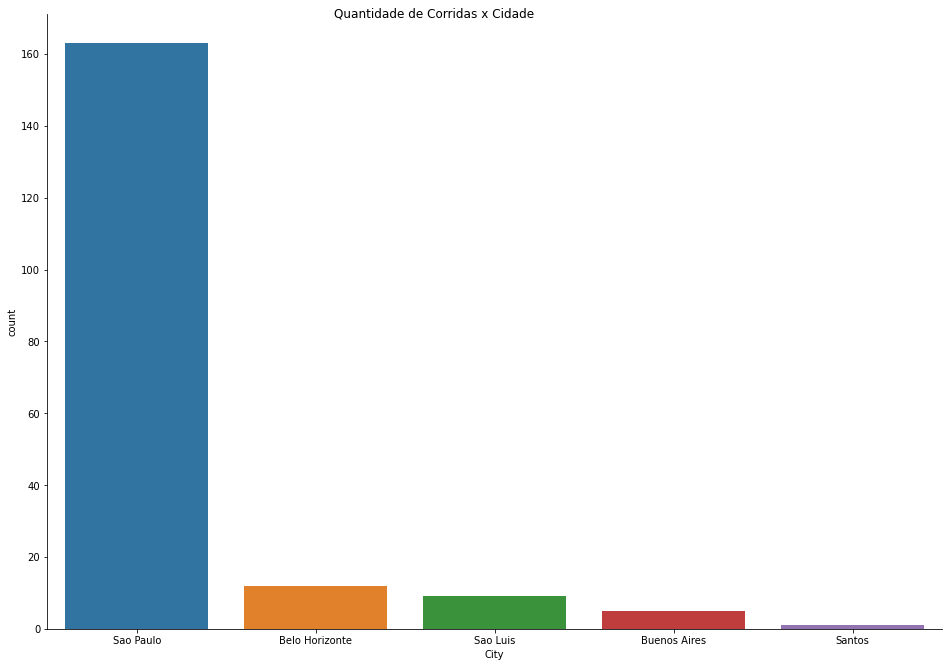

In [119]:
category_order = ['Sao Paulo', 'Belo Horizonte', 'Sao Luis', 'Buenos Aires', 'Santos']
graph = sns.catplot(x='City', 
                kind='count',
                data=trips, order = category_order) 
graph.fig.suptitle('Quantidade de Corridas x Cidade')
graph.fig.set_size_inches(15,10)

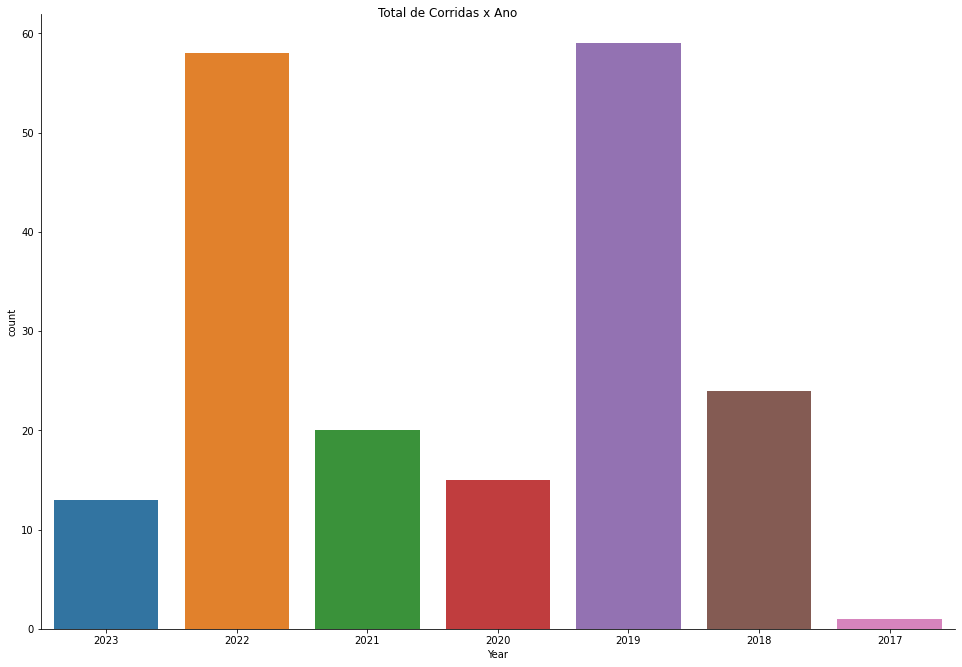

In [120]:
graph2 = sns.catplot(x='Year', 
                kind='count',
                data=trips)
graph2.fig.suptitle('Total de Corridas x Ano')
graph2.fig.set_size_inches(15,10)

Text(0.5, 1.0, 'Distância x Ano - em Km')

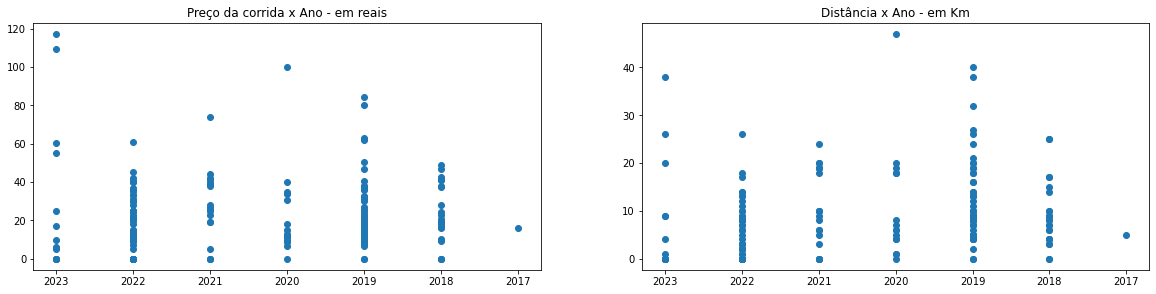

In [121]:
graph = plt.figure()
g3 = graph.add_subplot(2,2,1)
g4 = graph.add_subplot(2,2,2)

g3.scatter(trips['Year'], trips['Fare Amount BRL'])
g3.set_title('Preço da corrida x Ano - em reais')
g4.scatter(trips['Year'], trips['Distance Km'])
g4.set_title('Distância x Ano - em Km')



In [122]:
anos = trips.groupby('Year')


In [123]:
media_preco_ano = anos[['Year', 'Fare Amount BRL']].mean().round()
media_preco_ano = media_preco_ano.reset_index(level=0)
media_preco_ano

,Year,Fare Amount BRL
0,2017,16.0
1,2018,23.0
2,2019,23.0
3,2020,23.0
4,2021,28.0
5,2022,17.0
6,2023,31.0


[Text(0.5, 1.0, 'Média de Preço x Ano')]

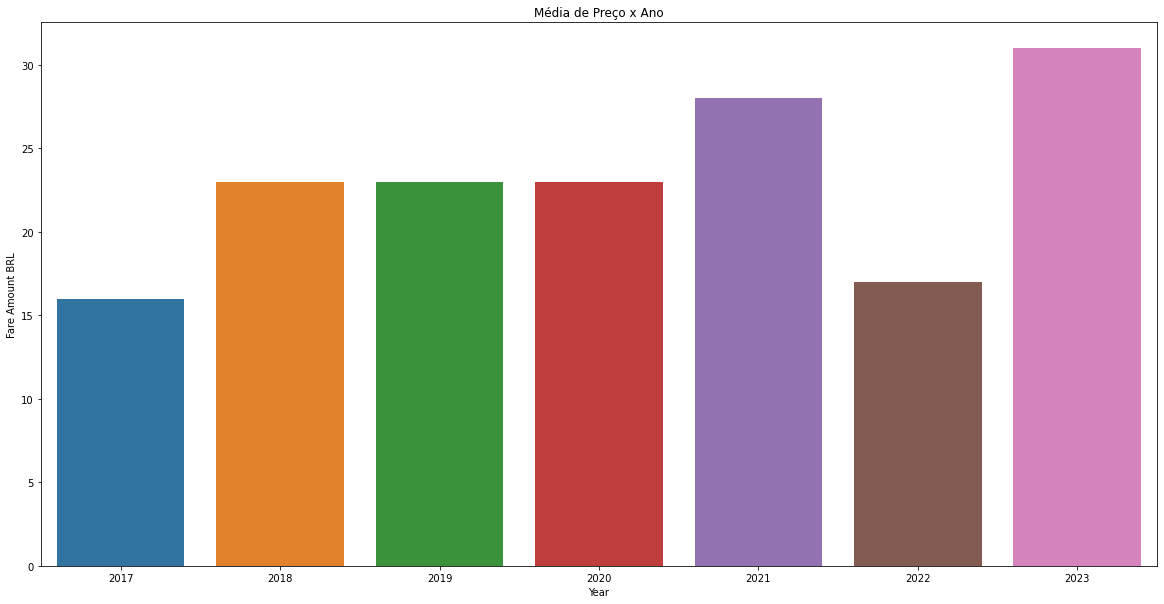

In [124]:
sns.barplot(data=media_preco_ano, x="Year", y="Fare Amount BRL").set(title='Média de Preço x Ano')



Text(0.5, 0.98, 'Box-plot dos valores da corrida por ano')

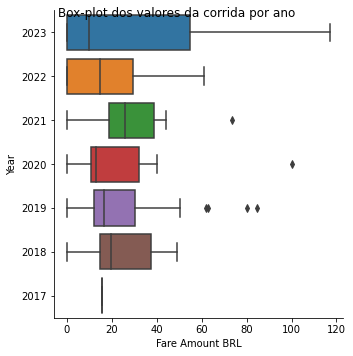

In [125]:
cp = sns.catplot(data=trips, x="Fare Amount BRL", y="Year", kind="box")
cp.fig.suptitle('Box-plot dos valores da corrida por ano')


In [126]:
trips.loc[trips['Year'] == '2021']


,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency,Year,Distance Km,Fare Amount BRL
71,Sao Paulo,UberX,COMPLETED,2021-12-17 23:02:32 +0000 UTC,2021-12-17 23:14:48 +0000 UTC,-23.651510,-46.567993,"R. Erina Tomé, 5 - Vila Afonsina, São Bernardo...",2021-12-17 23:30:54 +0000 UTC,-23.695538,-46.561497,"R. Domiciano Rossi, 600 - Jardim do Mar, São B...",3.75,26.17,BRL,2021,6.0,26.17
72,Sao Paulo,UberX,COMPLETED,2021-11-28 13:53:05 +0000 UTC,2021-11-28 13:57:29 +0000 UTC,-23.536840,-46.655025,"Alameda Barros, 391 - Santa Cecilia, São Paulo...",2021-11-28 14:34:15 +0000 UTC,-23.651577,-46.568012,"R. Erina Tomé, 87 - Vila Camargo, São Bernardo...",12.45,38.91,BRL,2021,20.0,38.91
73,Sao Paulo,UberX,COMPLETED,2021-11-28 04:25:48 +0000 UTC,2021-11-28 04:30:58 +0000 UTC,-23.545486,-46.645115,"R. Maj. Sertório, 110 - Vila Buarque, São Paul...",2021-11-28 04:41:33 +0000 UTC,-23.536749,-46.655030,"Alameda Barros, 378 - Santa Cecilia, São Paulo...",1.82,18.92,BRL,2021,3.0,18.92
74,Sao Paulo,UberX,COMPLETED,2021-11-27 13:25:58 +0000 UTC,2021-11-27 13:32:48 +0000 UTC,-23.545027,-46.650337,"R. Dr. Vila Nova, 142 - Vila Buarque, São Paul...",2021-11-27 14:08:43 +0000 UTC,-23.651693,-46.568024,"R. Erina Tomé, 99 - Vila Afonsina, São Bernard...",11.93,43.96,BRL,2021,19.0,43.96
75,Sao Paulo,UberX,COMPLETED,2021-11-26 22:59:50 +0000 UTC,2021-11-26 23:08:59 +0000 UTC,-23.651506,-46.568005,"R. Erina Tomé, 75 - Vila Camargo, São Bernardo...",2021-11-26 23:31:55 +0000 UTC,-23.601871,-46.603207,"R. Bom Pastor, 2911 - Ipiranga, São Paulo - SP...",5.44,25.90,BRL,2021,9.0,25.90
76,Sao Paulo,UberX,CANCELED,2021-11-14 01:50:05 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-23.623121,-46.662933,"Rua Félix de Souza, 139 - São Paulo - SP, 0461...",1970-01-01 00:00:00 +0000 UTC,-23.623121,-46.662932,"Rua Félix de Souza, 139 - São Paulo - SP, 0461...",0.00,0.00,BRL,2021,0.0,0.00
77,Sao Paulo,UberX,COMPLETED,2021-11-13 13:22:57 +0000 UTC,2021-11-13 13:30:26 +0000 UTC,-23.559872,-46.656124,"R. São Carlos do Pinhal, 23 - Bela Vista, São ...",2021-11-13 14:04:41 +0000 UTC,-23.651620,-46.568047,"R. Erina Tomé, 99 - Vila Afonsina, São Bernard...",11.76,41.07,BRL,2021,19.0,41.07
78,Sao Paulo,UberX,COMPLETED,2021-11-13 01:27:52 +0000 UTC,2021-11-13 01:32:46 +0000 UTC,-23.654590,-46.574930,"R. Lídia Tomé, 2 - Vila America, São Bernardo ...",2021-11-13 02:08:22 +0000 UTC,-23.546131,-46.642796,"Av. São Luís, 165 - República, São Paulo - SP,...",12.61,38.90,BRL,2021,20.0,38.90
79,Sao Paulo,UberX,COMPLETED,2021-11-07 10:00:38 +0000 UTC,2021-11-07 10:09:50 +0000 UTC,-23.601345,-46.602505,"R. Greenfeld, 131 - Ipiranga, São Paulo - SP, ...",2021-11-07 10:26:37 +0000 UTC,-23.651623,-46.568020,"R. Erina Tomé - Vila Camargo, São Bernardo do ...",6.07,27.94,BRL,2021,10.0,27.94
80,Sao Paulo,UberX,COMPLETED,2021-10-31 04:30:10 +0000 UTC,2021-10-31 04:39:15 +0000 UTC,-23.621687,-46.615658,"R. do Boqueirão, 305 - Vila da Saúde, São Paul...",2021-10-31 05:01:09 +0000 UTC,-23.651600,-46.567997,"R. Erina Tomé, 83 - Vila Camargo, São Bernardo...",6.22,24.90,BRL,2021,10.0,24.90


In [127]:
trips.loc[trips['Year'] == '2020']


,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency,Year,Distance Km,Fare Amount BRL
91,Sao Paulo,UberX,COMPLETED,2020-12-06 12:12:55 +0000 UTC,2020-12-06 12:19:46 +0000 UTC,-23.651588,-46.568030,"R. Erina Tomé, 87 - Vila Camargo, São Bernardo...",2020-12-06 12:56:06 +0000 UTC,-23.534843,-46.634200,"Praça da Luz, 2 - Bom Retiro, São Paulo - SP, ...",12.54,30.42,BRL,2020,20.0,30.42
92,Sao Paulo,UberX,COMPLETED,2020-11-15 02:55:07 +0000 UTC,2020-11-15 03:00:55 +0000 UTC,-23.654594,-46.574910,"R. Lídia Tomé, 2 - Vila America, São Bernardo ...",2020-11-15 03:12:51 +0000 UTC,-23.643475,-46.575832,"R. Amadeu Vezzaro, 139 - Jardim Sao Caetano, S...",2.87,18.23,BRL,2020,5.0,18.23
93,Sao Paulo,UberX,COMPLETED,2020-11-15 00:59:05 +0000 UTC,2020-11-15 01:07:31 +0000 UTC,-23.651583,-46.568016,"R. Erina Tomé, 87 - Vila Camargo, São Bernardo...",2020-11-15 01:24:27 +0000 UTC,-23.654562,-46.575000,"R. Lídia Tomé, 2 - Vila America, São Bernardo ...",2.79,11.53,BRL,2020,4.0,11.53
94,Sao Paulo,UberX,COMPLETED,2020-11-04 13:50:53 +0000 UTC,2020-11-04 13:51:47 +0000 UTC,-23.678995,-46.538284,"Av. Pereira Barreto, 1395 - Paraíso, Santo And...",2020-11-04 14:09:59 +0000 UTC,-23.651686,-46.568054,"R. Erina Tomé, 99 - Vila Afonsina, São Bernard...",3.99,12.80,BRL,2020,6.0,12.80
95,Sao Paulo,UberX,COMPLETED,2020-11-04 12:38:30 +0000 UTC,2020-11-04 12:43:27 +0000 UTC,-23.651630,-46.568085,"R. Erina Tomé, 99 - Vila Afonsina, São Bernard...",2020-11-04 12:57:22 +0000 UTC,-23.679022,-46.538270,"Av. Pereira Barreto, 1395 - Paraíso, Santo And...",4.13,11.82,BRL,2020,7.0,11.82
96,Sao Paulo,UberX,COMPLETED,2020-11-02 04:07:47 +0000 UTC,2020-11-02 04:13:34 +0000 UTC,-23.655912,-46.559986,"R. Dom Pedro Fernandes Sardinha, 77 - Vila Sac...",2020-11-02 04:18:29 +0000 UTC,-23.651558,-46.568027,"R. Erina Tomé, 87 - Vila Camargo, São Bernardo...",0.93,9.82,BRL,2020,1.0,9.82
97,Sao Paulo,UberX,COMPLETED,2020-11-01 21:57:51 +0000 UTC,2020-11-01 22:04:40 +0000 UTC,-23.651619,-46.568016,"R. Erina Tomé, 87 - Vila Camargo, São Bernardo...",2020-11-01 22:10:30 +0000 UTC,-23.655903,-46.559940,"R. Dom Pedro Fernandes Sardinha, 84 - Vila Sac...",0.91,6.56,BRL,2020,1.0,6.56
98,Sao Paulo,UberX,COMPLETED,2020-10-31 15:34:33 +0000 UTC,2020-10-31 15:40:46 +0000 UTC,-23.651339,-46.568073,"R. Erina Tomé, 63 - Vila Afonsina, São Bernard...",2020-10-31 16:26:42 +0000 UTC,-23.634985,-46.665245,"R. Ipiranga, 437 - Jardim Aeroporto, São Paulo...",11.28,34.54,BRL,2020,18.0,34.54
99,Sao Paulo,UberX,COMPLETED,2020-08-02 03:49:49 +0000 UTC,2020-08-02 03:52:36 +0000 UTC,-23.545434,-46.645125,"R. Maj. Sertório, 110 - Vila Buarque, São Paul...",2020-08-02 04:21:39 +0000 UTC,-23.651584,-46.568015,"R. Erina Tomé, 79 - Vila Camargo, São Bernardo...",11.46,40.04,BRL,2020,18.0,40.04
100,Sao Paulo,UberX,COMPLETED,2020-08-01 20:35:32 +0000 UTC,2020-08-01 20:40:32 +0000 UTC,-23.651605,-46.567997,"R. Erina Tomé, 83 - Vila Camargo, São Bernardo...",2020-08-01 21:13:17 +0000 UTC,-23.545319,-46.645133,"MARGARIDA - R. Maj. Sertório, 200 - República,...",11.98,33.45,BRL,2020,19.0,33.45


In [128]:
trips.loc[trips['Year'] == '2019']


,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency,Year,Distance Km,Fare Amount BRL
106,Sao Paulo,UberX,CANCELED,2019-12-20 22:56:30 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.00,0.00,BRL,2019,0.0,0.00
107,Sao Paulo,UberX,COMPLETED,2019-12-15 17:58:26 +0000 UTC,2019-12-15 18:09:18 +0000 UTC,-23.654857,-46.570544,"Rua Jacquey, 14 - Rudge Ramos, São Bernardo do...",2019-12-15 18:14:44 +0000 UTC,-23.655795,-46.560078,"R. Dom Pedro Fernandes Sardinha, 96 - Vila Sac...",0.96,6.62,BRL,2019,2.0,6.62
108,Sao Paulo,UberX,COMPLETED,2019-12-07 20:53:05 +0000 UTC,2019-12-07 21:00:43 +0000 UTC,-23.600861,-46.602773,"R. Agostinho Gomes, 3415 - Ipiranga, São Paulo...",2019-12-07 21:24:14 +0000 UTC,-23.671196,-46.549401,"R. Tupi, 35 - Vila Valparaiso, Santo André - S...",7.66,38.08,BRL,2019,12.0,38.08
109,Sao Paulo,UberX,COMPLETED,2019-12-07 11:31:53 +0000 UTC,2019-12-07 11:41:45 +0000 UTC,-23.651610,-46.568002,"R. Erina Tomé, 87 - Vila Camargo, São Bernardo...",2019-12-07 12:04:58 +0000 UTC,-23.601462,-46.603072,"R. Greenfeld, 64 - Ipiranga, São Paulo - SP, 0...",6.10,17.71,BRL,2019,10.0,17.71
110,Sao Paulo,UberX,COMPLETED,2019-11-30 16:22:49 +0000 UTC,2019-11-30 16:36:30 +0000 UTC,-23.654667,-46.572440,"R. Rafael Tomé, 116 - Rudge Ramos, São Bernard...",2019-11-30 16:53:31 +0000 UTC,-23.710848,-46.553351,"R. Luzitânia, 15 - Vila Lusitania, São Bernard...",5.88,16.46,BRL,2019,9.0,16.46
111,Sao Paulo,UberX,COMPLETED,2019-11-30 01:40:58 +0000 UTC,2019-11-30 01:42:41 +0000 UTC,-23.553394,-46.676957,"R. Oscar Freire, 2236 - Pinheiros, São Paulo -...",2019-11-30 01:58:18 +0000 UTC,-23.558202,-46.647301,"Rua dos Ingleses, 25 - Morro dos Ingleses, São...",3.11,13.06,BRL,2019,5.0,13.06
112,Sao Paulo,UberX,COMPLETED,2019-11-26 11:55:54 +0000 UTC,2019-11-26 11:57:19 +0000 UTC,-23.711089,-46.544330,"Av. Francisco Prestes Maia, 902 - Centro, São ...",2019-11-26 12:23:39 +0000 UTC,-23.651613,-46.568028,"R. Erina Tomé, 87 - Vila Camargo, São Bernardo...",5.45,18.71,BRL,2019,9.0,18.71
113,Sao Paulo,UberX,COMPLETED,2019-11-26 10:34:37 +0000 UTC,2019-11-26 10:42:47 +0000 UTC,-23.651520,-46.568060,"R. Erina Tomé, 75 - Vila Camargo, São Bernardo...",2019-11-26 11:08:40 +0000 UTC,-23.711030,-46.544330,"Av. Francisco Prestes Maia, 902 - Centro, São ...",5.41,20.90,BRL,2019,9.0,20.90
114,Sao Paulo,UberX,COMPLETED,2019-11-16 03:37:40 +0000 UTC,2019-11-16 03:42:36 +0000 UTC,-23.575009,-46.624187,"R. Heitor Peixoto, 303 - Cambuci, São Paulo - ...",2019-11-16 04:07:08 +0000 UTC,-23.651613,-46.568002,"R. Erina Tomé, 87 - Vila Camargo, São Bernardo...",8.74,29.85,BRL,2019,14.0,29.85
115,Sao Paulo,UberX,COMPLETED,2019-11-15 17:34:55 +0000 UTC,2019-11-15 17:39:11 +0000 UTC,-23.651600,-46.568040,"R. Erina Tomé, 87 - Vila Camargo, São Bernardo...",2019-11-15 18:07:51 +0000 UTC,-23.575060,-46.624080,"R. Heitor Peixoto, 325 - Vila Deodoro, São Pau...",7.83,25.57,BRL,2019,13.0,25.57


In [129]:
## Outliers em sua maioria são corridas após as 3 da manhã ou corridas compartilhadas.